## Structural distinction using pyiron and pyscal

In this tutorial, we will read in MD snapshots using pyiron. We will then use the pyscal module to indentify the structure in which the MD configuration is in.

Import necessary modules

In [5]:
import os
import pyiron
from ase.io import read
import pyscal.core as pc
import matplotlib.pyplot as plt

Create a pyiron project

In [6]:
pr = pyiron.Project('ADIS_Imported')

Read in the finished trajectories to the project

In [7]:
#loop over all the files in the dump folder
for folder in os.listdir('dump'):
    #create a pyiron job - with type structure
    job = pr.create_job(pr.job_type.StructureContainer, folder)
    #get each trajectory in the folder
    for snapshot in os.listdir(os.path.join(os.getcwd(), 'dump', folder)):
        job.structure_lst.append(pyiron.ase_to_pyiron(
            read(os.path.join(os.getcwd(), 'dump', folder, snapshot), 
                 style='atomic', format="lammps-data")
        ))
    job.run()

2020-11-02 16:01:09,486 - pyiron_log - WARNING - The job Mg_900_20 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2020-11-02 16:01:12,048 - pyiron_log - WARNING - The job Fe_1050_0 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2020-11-02 16:01:14,882 - pyiron_log - WARNING - The job Fe_1050_20 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2020-11-02 16:01:17,574 - pyiron_log - WARNING - The job Mg_500_20 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2020-11-02 16:01:19,012 - pyiron_log - WARNING - The job S5_s00_n130_r1024_400_0 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2020-11-02 16:01:20,888 - pyiron_log - WARNING - The job Mg_900_5 is being loaded instead of running. To re-run use the argument '

Check the job table 

In [8]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,H3980,Mg_900_20,/Mg_900_20,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:24.542694,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
1,2,finished,H2000,Fe_1050_0,/Fe_1050_0,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:25.407339,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
2,3,finished,H1980,Fe_1050_20,/Fe_1050_20,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:26.219146,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
3,4,finished,H3980,Mg_500_20,/Mg_500_20,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:27.287077,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
4,5,finished,H1584,S5_s00_n130_r1024_400_0,/S5_s00_n130_r1024_400_0,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:27.644628,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
5,6,finished,H3995,Mg_900_5,/Mg_900_5,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:28.603800,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
6,7,finished,H1980,Fe_750_20,/Fe_750_20,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:29.434059,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
7,8,finished,H2000,Cu_720_0,/Cu_720_0,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:30.354221,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
8,9,finished,H1534,S5_s00_n130_r1024_720_0,/S5_s00_n130_r1024_720_0,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:30.695745,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None
9,10,finished,H1534,S5_s00_n130_r1024_560_20,/S5_s00_n130_r1024_560_20,/home/sarath/,Repos/structural_analysis_ADIS_2020/notebooks/ADIS_Imported/,2020-11-01 18:54:31.056448,None,None,pyiron@blanquita#1,AtomisticGenericJob,0.2.0,None,None


We can try an FCC structure, Copper at 400 K

In [57]:
job = pr.load("Cu_400_0")

Get the structure from the job

In [59]:
Cu400 = job.get_structure()

---

## Common Neighbor Analysis

This is a simple FCC structure, so we can an adaptive common neighbor analysis method to find the structure. CNA uses three indices for each pair of atoms, let's say $i$ and $j$:

- The number of common neighbors shared by atoms $i$ and $j$
- The number of bonds among these common neighbors
- The longest chain of bonds connecting these neighbors

<img src="cna.png" alt="drawing" width="500"/>

Image source: arXiv:2003.08879

In [64]:
from pyiron.atomistics.structure.pyscal import analyse_cna_adaptive

In [65]:
analyse_cna_adaptive(Cu400)

[0, 2000, 0, 0, 0]

The numbers are in the order : Others, fcc, hcp, bcc, icosahedral. From the numbers, it is clear that the system is completely fcc structured.

Let's try for a different structure. Cu at 720 K.

In [66]:
job = pr.load("Cu_720_0")
Cu720 = job.get_structure()

In [67]:
analyse_cna_adaptive(Cu720)

[165, 1835, 0, 0, 0]

When we follow the same procedure, theres only 1835 atoms. 165 atoms are now identified as Others. Structural identification becomes increasingly difficult at higher temperatures.

---

## Steinhardt's parameters

[Steinhardt\'s bond orientational order parameters](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.28.784) are a set of
parameters based on [spherical
harmonics](https://en.wikipedia.org/wiki/Spherical_harmonics) to explore
the local atomic environment. These parameters have been used
extensively for various uses such as distinction of crystal structures,
identification of solid and liquid atoms and identification of
defects.

These parameters, which are rotationally and translationally invariant
are defined by,

> $$ q_l (i) =  \Big(  \frac{4\pi}{2l+1}  \sum_{m=-l}^l | q_{lm}(i) |^2 \Big )^{\frac{1}{2}} $$

where,

> $$ q_{lm} (i) =  \frac{1}{N(i)} \sum_{j=1}^{N(i)} Y_{lm}(\pmb{r}_{ij}) $$

in which $Y_{lm}$ are the spherical harmonics and $N(i)$ is the number
of neighbours of particle $i$, $\pmb{r}_{ij}$ is the vector connecting
particles $i$ and $j$, and $l$ and $m$ are both intergers with
$m \in [-l,+l]$. Various parameters have found specific uses, such as
$q_2$ and $q_6$ for identification of crystallinity, $q_6$ for
identification of solidity, and $q_4$ and $q_6$ for [distinction of
crystal structures](https://aip.scitation.org/doi/full/10.1063/1.4774084).

First a function to calculate Steinhardt's parameters

In [3]:
from pyiron.atomistics.structure.pyscal import get_steinhardt_parameter_job

We will take the basic lattices - bcc, fcc and hcp and see how the Steinhardt's parameters look

In [40]:
bccq, _ = get_steinhardt_parameter_job(pr.load("Fe_750_0"), cutoff=3.3, clustering=False)
fccq, _ = get_steinhardt_parameter_job(pr.load("Cu_400_0"), clustering=False)
hcpq, _ = get_steinhardt_parameter_job(pr.load("Mg_500_0"), clustering=False)

Lets plot the values

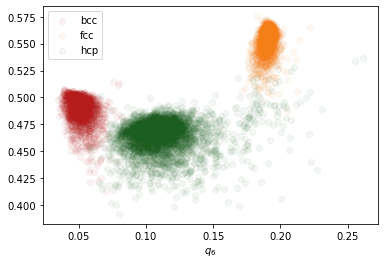

In [49]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.xlabel(r"$q_4$")
plt.ylabel(r"$q_6$")
plt.legend()

The distributions look well separated. Lets try at a higher temperature.

In [50]:
bccq, _ = get_steinhardt_parameter_job(pr.load("Fe_1350_0"), cutoff=3.3, clustering=False)
fccq, _ = get_steinhardt_parameter_job(pr.load("Cu_720_0"), clustering=False)
hcpq, _ = get_steinhardt_parameter_job(pr.load("Mg_1000_0"), clustering=False)

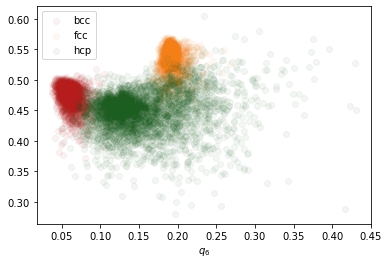

In [51]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.xlabel(r"$q_4$")
plt.ylabel(r"$q_6$")
plt.legend()

It gets worse due to thermal fluctuations, but we can averaged the values over the neighbors

In [52]:
bccq, _ = get_steinhardt_parameter_job(pr.load("Fe_1350_0"), cutoff=3.3, averaged=True, clustering=False)
fccq, _ = get_steinhardt_parameter_job(pr.load("Cu_720_0"), averaged=True, clustering=False)
hcpq, _ = get_steinhardt_parameter_job(pr.load("Mg_1000_0"), averaged=True, clustering=False)

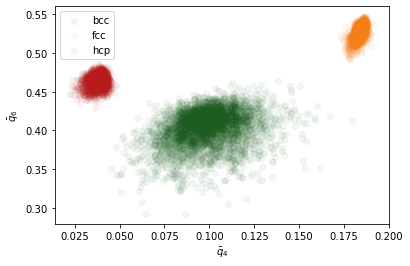

In [55]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.xlabel(r"$\bar{q}_4$")
plt.ylabel(r"$\bar{q}_6$")
plt.legend()

We can also try adding a diamond structure to the mix

In [57]:
diaq, _ = get_steinhardt_parameter_job(pr.load("Si_1400_0"), averaged=True, clustering=False)

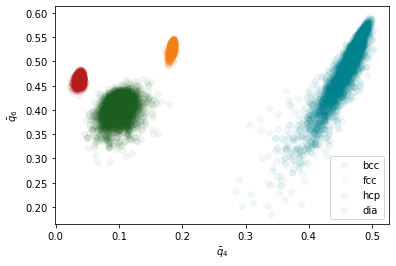

In [58]:
plt.scatter(bccq[0], bccq[1], alpha=0.05, label="bcc", color="#B71C1C")
plt.scatter(fccq[0], fccq[1], alpha=0.05, label="fcc", color="#F57F17")
plt.scatter(hcpq[0], hcpq[1], alpha=0.05, label="hcp", color="#1B5E20")
plt.scatter(diaq[0], diaq[1], alpha=0.05, label="dia", color="#00838F")
plt.xlabel(r"$\bar{q}_4$")
plt.ylabel(r"$\bar{q}_6$")
plt.legend()